In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

19:44 9th of April, 4 minutes of thumb data was collected. Fatigue started to set in after 2 minutes. 

In [2]:
data = pd.read_csv("../data/thumb_dataset-240-raw-False.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_tip_x,Thumb_tip_x,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
0,22,97,181,101,41,28,21,16,-25.039949,32.182156,...,-71.639175,-82.485039,-79.241676,-61.709194,129.794708,108.424622,123.778557,112.778519,107.368111,103.809875
1,21,105,179,101,41,27,21,17,-25.519659,31.843992,...,-71.908295,-82.824959,-79.632011,-62.090153,131.520050,110.327995,125.920441,114.934250,109.532303,105.827309
2,25,111,172,99,38,25,20,16,-26.135538,31.398361,...,-72.181793,-83.178368,-80.051361,-62.483780,134.186081,113.313698,129.309814,118.295685,112.899376,108.951157
3,24,111,136,79,38,28,21,19,-26.490540,31.150013,...,-72.338089,-83.401817,-80.305946,-62.708717,135.932877,115.263504,131.405853,120.392548,114.974617,110.859413
4,26,117,121,95,36,25,21,19,-26.764303,31.006012,...,-72.494530,-83.594994,-80.536850,-62.925777,137.491394,117.034042,133.310364,122.237373,116.818909,112.569565


<AxesSubplot:>

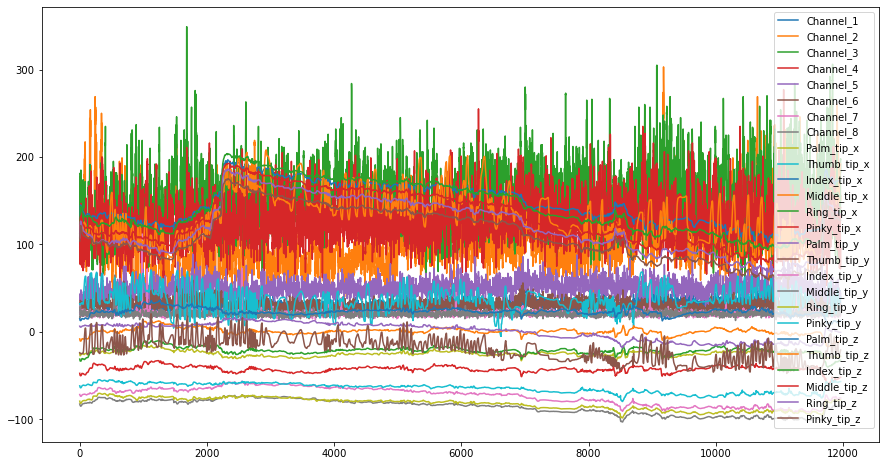

In [4]:
plt.rc('figure', figsize=(15, 8))

data.plot(figsize=(15, 8))

<AxesSubplot:>

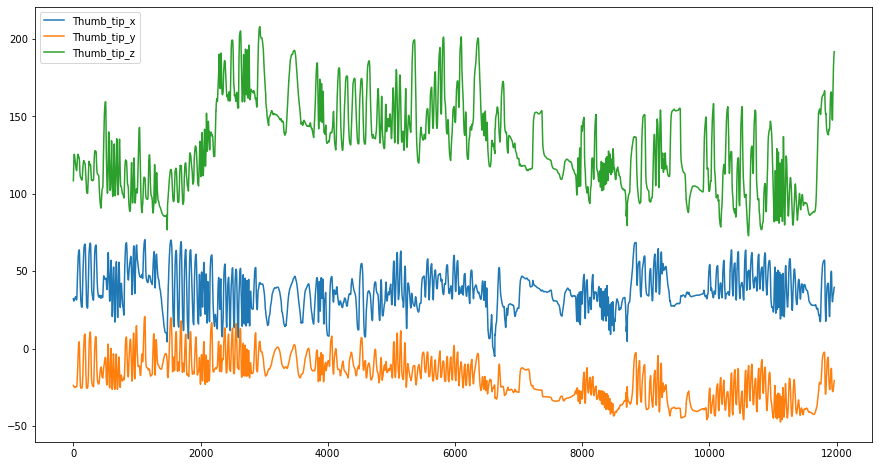

In [5]:
# Just considering the thumb
cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z']
df = data[cols]
df.plot()

In [6]:
data.var()

Channel_1         26.441591
Channel_2       1274.125049
Channel_3       1026.810339
Channel_4        624.197738
Channel_5         69.139899
Channel_6         23.209240
Channel_7         12.868227
Channel_8          5.460854
Palm_tip_x         9.118619
Thumb_tip_x      154.967754
Index_tip_x       15.463103
Middle_tip_x      16.139826
Ring_tip_x        16.399792
Pinky_tip_x       12.850954
Palm_tip_y        96.295916
Thumb_tip_y      184.535722
Index_tip_y       97.367158
Middle_tip_y      72.044939
Ring_tip_y        46.562254
Pinky_tip_y       29.340387
Palm_tip_z       562.493401
Thumb_tip_z      790.987952
Index_tip_z      894.656527
Middle_tip_z     948.581040
Ring_tip_z       989.556418
Pinky_tip_z      903.664273
dtype: float64

<AxesSubplot:>

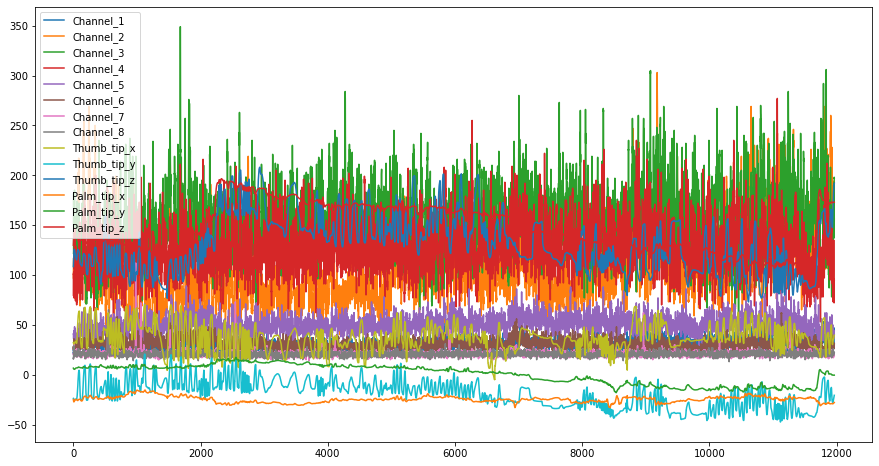

In [7]:
# Just considering the data we care about
cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8','Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[cols]
df.plot()

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

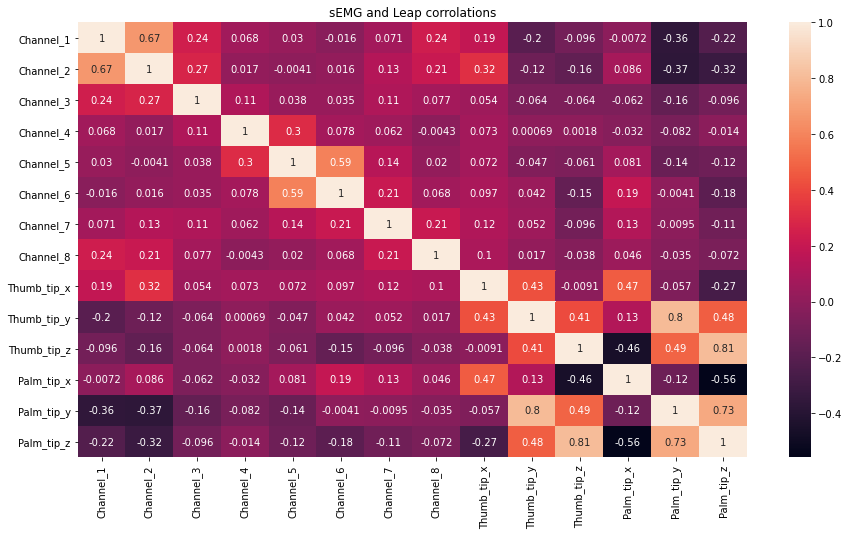

In [8]:
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")


## The 30 second thumb data
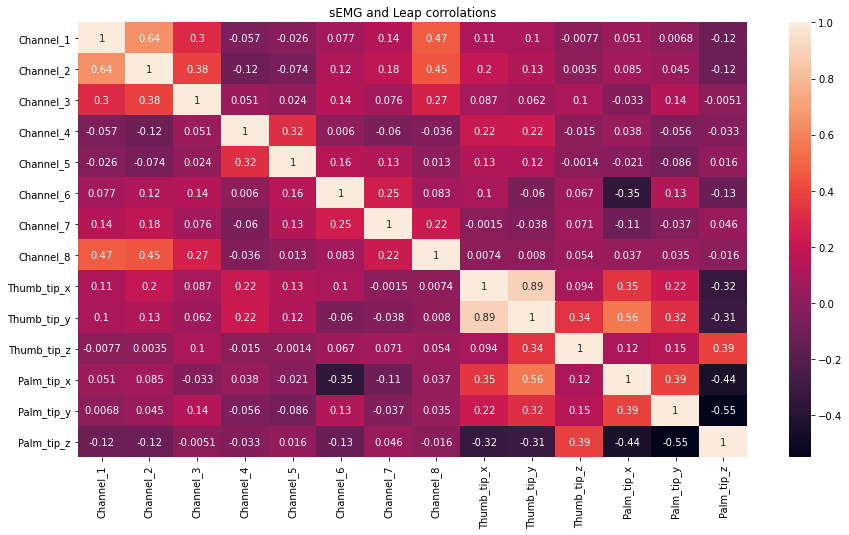

# Feature engineering: relative positions

<ipython-input-9-69a715ef4de4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
<ipython-input-9-69a715ef4de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
<ipython-input-9-69a715ef4de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

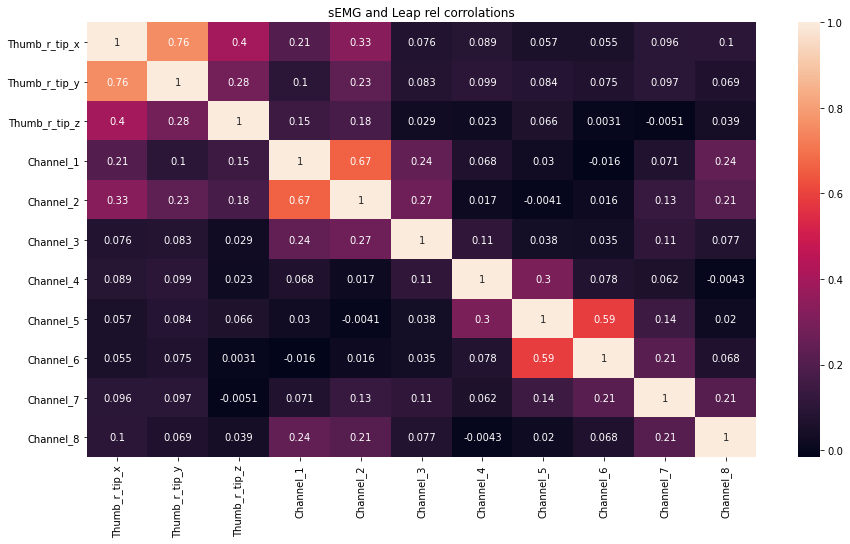

In [9]:
df_rel = df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

df_rel = df_rel[['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z',
                 'Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

# Making some baseline ML

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [11]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_r_tip_x']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Y: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Y: 8.22693981052461


In [12]:
for y_var in y_cols:
    y = df_rel[y_var]
    X = df_rel[x_cols]
    train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)
    
    my_model = XGBRegressor()
    # Add silent=True to avoid printing out updates with each cycle
    my_model.fit(train_X, train_y, verbose=False)

    predictions = my_model.predict(test_X)

    from sklearn.metrics import mean_absolute_error
    print(f"Mean Absolute Error {y_var}: {str(mean_absolute_error(predictions, test_y))}")

Mean Absolute Error Thumb_r_tip_x: 8.132174468370165
Mean Absolute Error Thumb_r_tip_y: 5.958341858656731
Mean Absolute Error Thumb_r_tip_z: 12.821256742867476


# Neural Network Approach

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df_rel[y_cols]
X = df_rel[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [17]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mae', optimizer='Adam')
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 68,939
Trainable params: 68,939
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1461 - val_loss: 0.1325
Epoch 2/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1331 - val_loss: 0.1330
Epoch 3/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.1306
Epoch 4/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1315 - val_loss: 0.1309
Epoch 5/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1310 - val_loss: 0.1311
Epoch 6/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1314 - val_loss: 0.1303
Epoch 7/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1312 - val_loss: 0.1306
Epoch 8/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1306 - val_loss: 0.1314
Epoch 9/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1306 - val_loss: 0.1306
Epoch 10/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1303 - val_lo

Epoch 161/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1203 - val_loss: 0.1262
Epoch 162/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1202 - val_loss: 0.1268
Epoch 163/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1201 - val_loss: 0.1260
Epoch 164/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1203 - val_loss: 0.1264
Epoch 165/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1199 - val_loss: 0.1259
Epoch 166/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1199 - val_loss: 0.1266
Epoch 167/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1200 - val_loss: 0.1258
Epoch 168/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1198 - val_loss: 0.1273
Epoch 169/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1197 - val_loss: 0.1262
Epoch 170/500
281/281 [==============================] - 0s 1ms/step - lo

281/281 [==============================] - 0s 1ms/step - loss: 0.1093 - val_loss: 0.1283
Epoch 320/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.1280
Epoch 321/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1094 - val_loss: 0.1276
Epoch 322/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.1284
Epoch 323/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.1283
Epoch 324/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1093 - val_loss: 0.1288
Epoch 325/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.1278
Epoch 326/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.1288
Epoch 327/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.1287
Epoch 328/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1086 - v

281/281 [==============================] - 0s 1ms/step - loss: 0.1029 - val_loss: 0.1309
Epoch 478/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1030 - val_loss: 0.1303
Epoch 479/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1027 - val_loss: 0.1308
Epoch 480/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1024 - val_loss: 0.1307
Epoch 481/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1027 - val_loss: 0.1326
Epoch 482/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1029 - val_loss: 0.1312
Epoch 483/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1028 - val_loss: 0.1311
Epoch 484/500
281/281 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.1296
Epoch 485/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1025 - val_loss: 0.1303
Epoch 486/500
281/281 [==============================] - 0s 1ms/step - loss: 0.1031 - v

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

prediction = NN_model.predict(train_X) # scaled inputs here

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

MSE:  108.84066704488804
RMSE:  10.432673053675556
MAE:  6.9740434237661075


In [21]:
prediction = NN_model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.5477434  0.22115622 0.28137416]
 [0.8130591  0.51884747 0.63334477]
 [0.6772191  0.4146212  0.24827254]
 ...
 [0.6079911  0.2824272  0.3924489 ]
 [0.47275198 0.16193265 0.3180101 ]
 [0.55044067 0.3592801  0.21954292]]
MSE:  155.6722293570873
RMSE:  12.476867770281421
MAE:  8.949775564932464


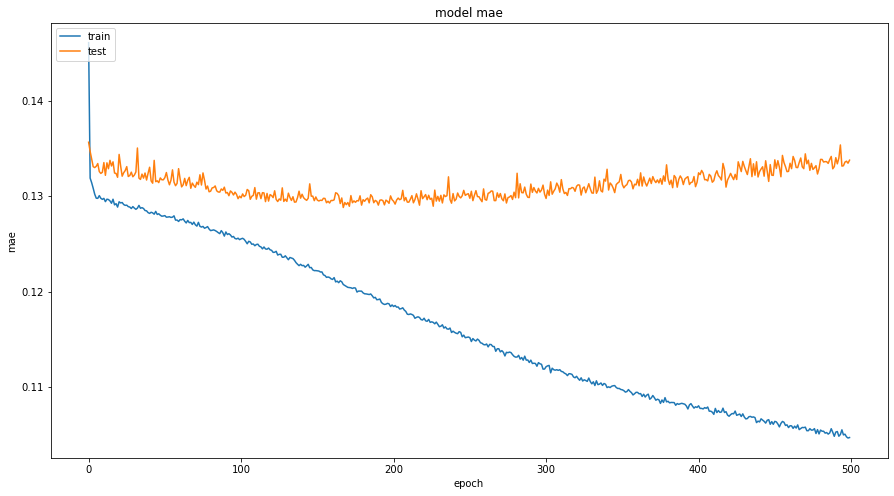

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using MSE gave a worse model than using MAE, I wanted to penalize larger errors more.  

Checking unscaled prediction:

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.51659936 0.19380674 0.22496858]
 [0.5683371  0.2638457  0.2465759 ]
 [0.59751666 0.28172112 0.261401  ]
 ...
 [0.5005095  0.1953798  0.23839377]
 [0.58931565 0.27166003 0.2430032 ]
 [0.54954875 0.21240345 0.26735455]]
MSE:  117.8778490935108
RMSE:  10.857156584184958
MAE:  7.1036032349998335


### Save the model and the scalers

In [20]:
import joblib

model_name = "NNRel-4mins-MinMaxScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-4mins-MinMaxScaled-EMG.gz']

In [21]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred

array([[ 73.26146 , -14.195723, -13.194089]], dtype=float32)

## RNN

LSTM layer is a recurrent layer, hence it expects a 3-dimensional input (batch_size, timesteps, input_dim).

For some reason, using LSTMs gave me a: CuDNNLSTM: UnknownError: Fail to find the dnn implementation.
Which was solved enabling memory growth with:
```
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
```
Found on stackoverflow [here](https://stackoverflow.com/questions/54473254/cudnnlstm-unknownerror-fail-to-find-the-dnn-implementation).

In [22]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM

In [23]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df_rel[y_cols]
X = df_rel[x_cols]

In [24]:
def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X)

In [25]:
Xs.shape

(11965, 16)

In [26]:
rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]
timesteps = 2

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

In [27]:
ny.shape, nX.shape

((11965, 3), (11965, 8, 2))

In [28]:
ny

array([[0.5148085 , 0.08111523, 0.26665062],
       [0.51720715, 0.08138093, 0.2704418 ],
       [0.51870984, 0.08251829, 0.27284947],
       ...,
       [0.6553075 , 0.28927803, 0.73821837],
       [0.65657884, 0.29175517, 0.7405678 ],
       [0.65765816, 0.29391423, 0.7427043 ]], dtype=float32)

In [29]:
rel_hand_scaler.transform(y)

array([[0.51281415, 0.08016971, 0.2645392 ],
       [0.51480846, 0.08111523, 0.2666506 ],
       [0.51720717, 0.08138093, 0.27044181],
       ...,
       [0.65530748, 0.28927802, 0.73821834],
       [0.65657884, 0.29175518, 0.74056781],
       [0.65765814, 0.29391423, 0.74270427]])

In [30]:
y.head()

,Thumb_r_tip_x,Thumb_r_tip_y,Thumb_r_tip_z
0,57.222105,-30.317660,-21.370087
1,57.363651,-30.272983,-21.192055
2,57.533899,-30.260427,-20.872383
3,57.640553,-30.206685,-20.669373
4,57.770315,-30.117426,-20.457352


In [31]:
Xs

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_1_p1,Channel_2_p1,Channel_3_p1,Channel_4_p1,Channel_5_p1,Channel_6_p1,Channel_7_p1,Channel_8_p1
1,21.0,105.0,179.0,101.0,41.0,27.0,21.0,17.0,22.0,97.0,181.0,101.0,41.0,28.0,21.0,16.0
2,25.0,111.0,172.0,99.0,38.0,25.0,20.0,16.0,21.0,105.0,179.0,101.0,41.0,27.0,21.0,17.0
3,24.0,111.0,136.0,79.0,38.0,28.0,21.0,19.0,25.0,111.0,172.0,99.0,38.0,25.0,20.0,16.0
4,26.0,117.0,121.0,95.0,36.0,25.0,21.0,19.0,24.0,111.0,136.0,79.0,38.0,28.0,21.0,19.0
5,27.0,102.0,122.0,103.0,38.0,28.0,24.0,24.0,26.0,117.0,121.0,95.0,36.0,25.0,21.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11961,36.0,161.0,192.0,76.0,41.0,30.0,21.0,22.0,42.0,158.0,137.0,105.0,38.0,26.0,20.0,23.0
11962,35.0,155.0,182.0,72.0,39.0,30.0,20.0,22.0,36.0,161.0,192.0,76.0,41.0,30.0,21.0,22.0
11963,30.0,155.0,198.0,88.0,41.0,30.0,20.0,21.0,35.0,155.0,182.0,72.0,39.0,30.0,20.0,22.0
11964,31.0,150.0,198.0,96.0,44.0,30.0,20.0,22.0,30.0,155.0,198.0,88.0,41.0,30.0,20.0,21.0


In [32]:
df_rel.head()

,Thumb_r_tip_x,Thumb_r_tip_y,Thumb_r_tip_z,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,57.222105,-30.317660,-21.370087,22,97,181,101,41,28,21,16
1,57.363651,-30.272983,-21.192055,21,105,179,101,41,27,21,17
2,57.533899,-30.260427,-20.872383,25,111,172,99,38,25,20,16
3,57.640553,-30.206685,-20.669373,24,111,136,79,38,28,21,19
4,57.770315,-30.117426,-20.457352,26,117,121,95,36,25,21,19


In [33]:
train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [34]:
train_X.shape, train_y.shape

((11465, 8, 2), (11465, 3))

## Simple RNN Arc

In [35]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))

model.compile(loss='mae', optimizer='adam')

In [36]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
160/160 - 1s - loss: 0.1647 - val_loss: 0.1562
Epoch 2/50
160/160 - 0s - loss: 0.1394 - val_loss: 0.1507
Epoch 3/50
160/160 - 0s - loss: 0.1384 - val_loss: 0.1470
Epoch 4/50
160/160 - 0s - loss: 0.1378 - val_loss: 0.1449
Epoch 5/50
160/160 - 0s - loss: 0.1373 - val_loss: 0.1433
Epoch 6/50
160/160 - 0s - loss: 0.1369 - val_loss: 0.1425
Epoch 7/50
160/160 - 0s - loss: 0.1367 - val_loss: 0.1417
Epoch 8/50
160/160 - 0s - loss: 0.1365 - val_loss: 0.1412
Epoch 9/50
160/160 - 0s - loss: 0.1363 - val_loss: 0.1407
Epoch 10/50
160/160 - 0s - loss: 0.1362 - val_loss: 0.1402
Epoch 11/50
160/160 - 0s - loss: 0.1361 - val_loss: 0.1399
Epoch 12/50
160/160 - 0s - loss: 0.1360 - val_loss: 0.1397
Epoch 13/50
160/160 - 0s - loss: 0.1359 - val_loss: 0.1396
Epoch 14/50
160/160 - 0s - loss: 0.1359 - val_loss: 0.1395
Epoch 15/50
160/160 - 0s - loss: 0.1358 - val_loss: 0.1395
Epoch 16/50
160/160 - 0s - loss: 0.1357 - val_loss: 0.1394
Epoch 17/50
160/160 - 0s - loss: 0.1357 - val_loss: 0.1394
Epoch 

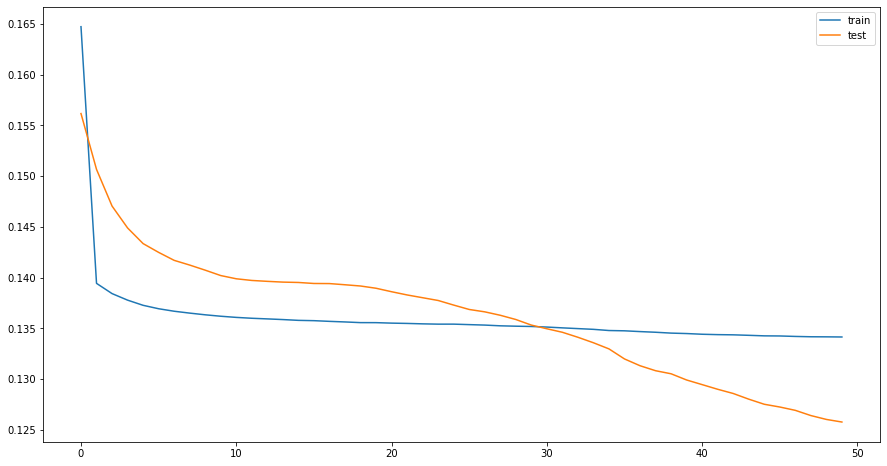

In [37]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [38]:
mea = model.evaluate(test_X, test_y)
mea

16/16 [==============================] - 0s 2ms/step - loss: 0.1258


0.12575651705265045

# Non Trivial RNN Arc

In [39]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam', metrics=['mae', 'mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8, 50)             10600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                714       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 45        
Total params: 31,559
Trainable params: 31,559
Non-trainable params: 0
_________________________________________________________________


In [40]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=False)

Epoch 1/50
160/160 [==============================] - 1s 7ms/step - loss: 0.1543 - mae: 0.1543 - mse: 0.0419 - val_loss: 0.1866 - val_mae: 0.1866 - val_mse: 0.0592
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.1436 - mae: 0.1436 - mse: 0.0363 - val_loss: 0.1589 - val_mae: 0.1589 - val_mse: 0.0458
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.1408 - mae: 0.1408 - mse: 0.0353 - val_loss: 0.1509 - val_mae: 0.1509 - val_mse: 0.0418
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.1395 - mae: 0.1395 - mse: 0.0351 - val_loss: 0.1479 - val_mae: 0.1479 - val_mse: 0.0399
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.1387 - mae: 0.1387 - mse: 0.0351 - val_loss: 0.1469 - val_mae: 0.1469 - val_mse: 0.0391
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.1382 - mae: 0.1382 - mse: 0.0350 - val_loss: 0.1465 - val_mae: 0.1465 - val_mse: 0.0384
Epoch 7/50
160/1

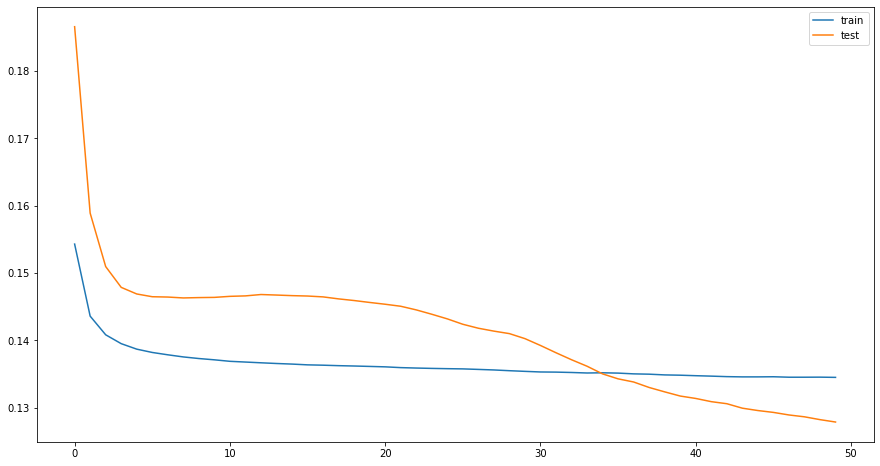

In [41]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

MAE still performs better as a loss than MSE

Results of minimising MSE loss

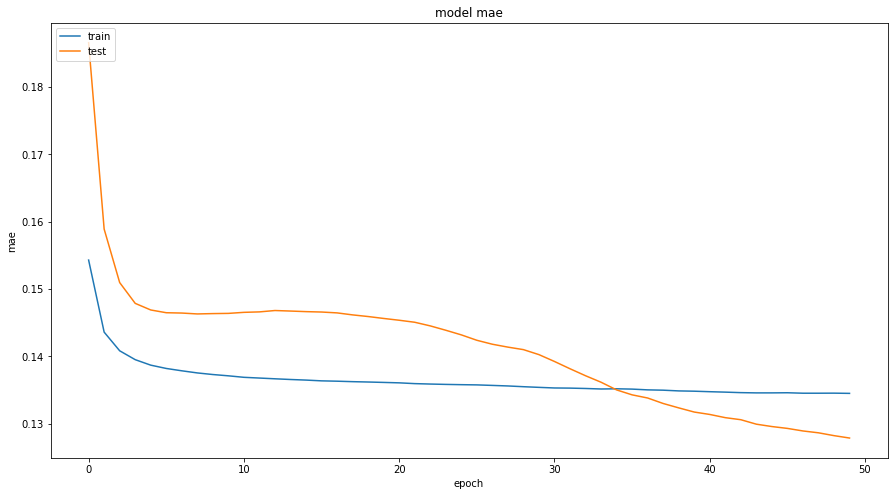

In [42]:
# summarize history for loss
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
def get_metrics(model, y_scaler, scaled_X, scaled_y):# Training Metrics
    prediction = model.predict(scaled_X) # scaled inputs here

    # Scaling back the prediction
    preds = y_scaler.inverse_transform(prediction)
    # Scaling back the goals
    goal = y_scaler.inverse_transform(scaled_y)

    MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
    print("MSE: ", MSE)
    print("RMSE: ", np.sqrt(MSE))  # 3rd step
    MAE = mean_absolute_error(goal, preds)
    print("MAE: ", MAE)

In [44]:
print("Train:")
get_metrics(model, rel_hand_scaler, train_X, train_y)
print("\nTest:")
get_metrics(model, rel_hand_scaler, test_X, test_y)

Train:
MSE:  160.4597
RMSE:  12.667269
MAE:  9.027473

Test:
MSE:  121.15713
RMSE:  11.00714
MAE:  8.107034


In [45]:
# Saving RNN Model

model_name = "RNNRel-4mins-MinMaxScaled"

model.save(f"../models/{model_name}.h5")

## Longer Timesequence RNN

In [46]:
timesteps = 20

y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df_rel[y_cols]
X = df_rel[x_cols]

def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X, timesteps)

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [47]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 8, 64)             21760     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 14)                462       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [48]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1472 - val_loss: 0.1306
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1312 - val_loss: 0.1127
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1271 - val_loss: 0.1142
Epoch 4/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1247 - val_loss: 0.1043
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1243 - val_loss: 0.1111
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1233 - val_loss: 0.1083
Epoch 7/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1232 - val_loss: 0.1085
Epoch 8/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1213 - val_loss: 0.1172
Epoch 9/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1212 - val_loss: 0.1097
Epoch 10/50
159/159 [==============================] - 1s 4ms/step - loss: 0.1201 - val_loss: 0.1209

16/16 [==============================] - 0s 2ms/step - loss: 0.1223


0.1222662553191185

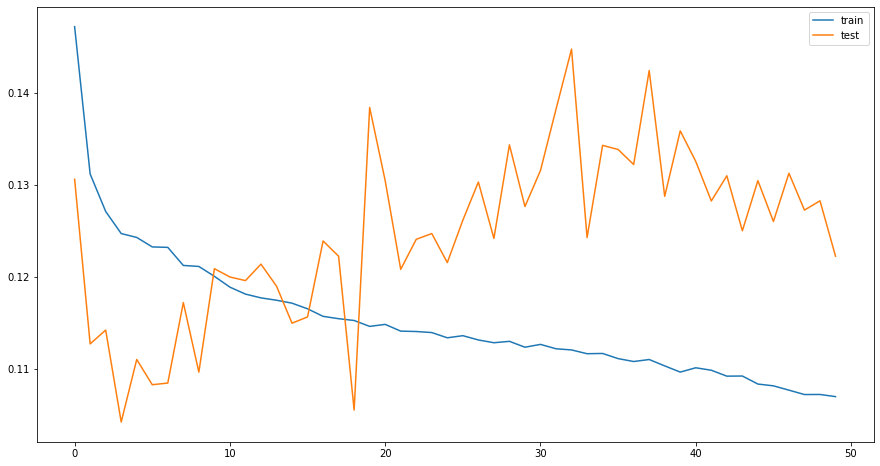

In [49]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [50]:
print("Train:")
get_metrics(model, rel_hand_scaler, train_X, train_y)
print("\nTest:")
get_metrics(model, rel_hand_scaler, test_X, test_y)

Train:
MSE:  104.68506
RMSE:  10.231571
MAE:  7.2148805

Test:
MSE:  102.68375
RMSE:  10.133299
MAE:  8.019168


### 1 million parameter RNN

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM

In [52]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 8, 256)            283648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 8, 256)            525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

In [53]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
159/159 [==============================] - 1s 9ms/step - loss: 0.1826 - val_loss: 0.1535
Epoch 2/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1321 - val_loss: 0.1491
Epoch 3/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1298 - val_loss: 0.1383
Epoch 4/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1282 - val_loss: 0.1397
Epoch 5/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1267 - val_loss: 0.1195
Epoch 6/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1258 - val_loss: 0.1196
Epoch 7/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1244 - val_loss: 0.1205
Epoch 8/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1230 - val_loss: 0.1186
Epoch 9/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1224 - val_loss: 0.0947
Epoch 10/50
159/159 [==============================] - 1s 6ms/step - loss: 0.1222 - val_loss: 0.1040

16/16 [==============================] - 0s 2ms/step - loss: 0.1300


0.13001999258995056

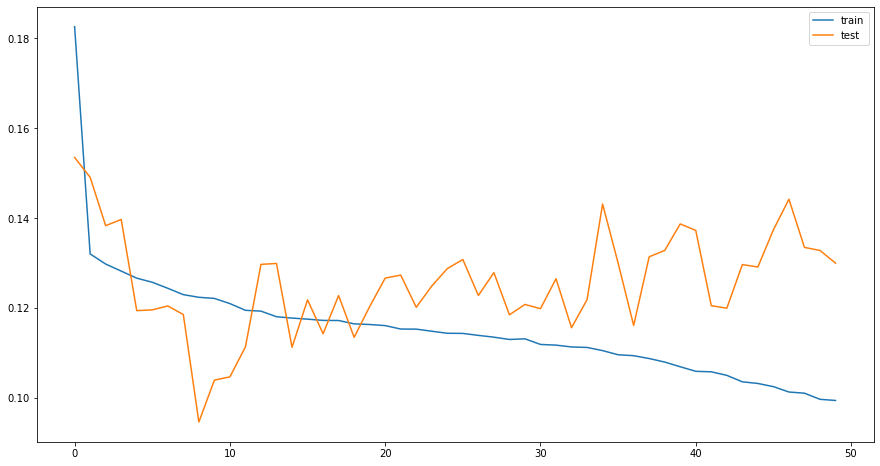

In [54]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [55]:
print("Train:")
get_metrics(model, rel_hand_scaler, train_X, train_y)
print("\nTest:")
get_metrics(model, rel_hand_scaler, test_X, test_y)

Train:
MSE:  96.85425
RMSE:  9.841455
MAE:  6.8336434

Test:
MSE:  128.12355
RMSE:  11.319167
MAE:  8.597791


Adding early stopping. 

In [56]:
from keras.callbacks import EarlyStopping
# The patience parameter is the amount of epochs to check for improvement
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [57]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mse', optimizer='Adam', metrics=['mae', 'mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 8, 256)            283648    
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 8, 256)            525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

In [58]:
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), shuffle=True, callbacks=[early_stop])

Epoch 1/500
159/159 [==============================] - 2s 10ms/step - loss: 0.1593 - mae: 0.2681 - mse: 0.1593 - val_loss: 0.0390 - val_mae: 0.1569 - val_mse: 0.0390
Epoch 2/500
159/159 [==============================] - 1s 7ms/step - loss: 0.0368 - mae: 0.1502 - mse: 0.0368 - val_loss: 0.0352 - val_mae: 0.1500 - val_mse: 0.0352
Epoch 3/500
159/159 [==============================] - 1s 7ms/step - loss: 0.0317 - mae: 0.1394 - mse: 0.0317 - val_loss: 0.0320 - val_mae: 0.1387 - val_mse: 0.0320
Epoch 4/500
159/159 [==============================] - 1s 7ms/step - loss: 0.0296 - mae: 0.1349 - mse: 0.0296 - val_loss: 0.0206 - val_mae: 0.1161 - val_mse: 0.0206
Epoch 5/500
159/159 [==============================] - 1s 7ms/step - loss: 0.0291 - mae: 0.1335 - mse: 0.0291 - val_loss: 0.0210 - val_mae: 0.1136 - val_mse: 0.0210
Epoch 6/500
159/159 [==============================] - 1s 7ms/step - loss: 0.0284 - mae: 0.1318 - mse: 0.0284 - val_loss: 0.0223 - val_mae: 0.1230 - val_mse: 0.0223
Epoch 7/5

16/16 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1264 - mse: 0.0229


[0.02290489338338375, 0.1263691782951355, 0.02290489338338375]

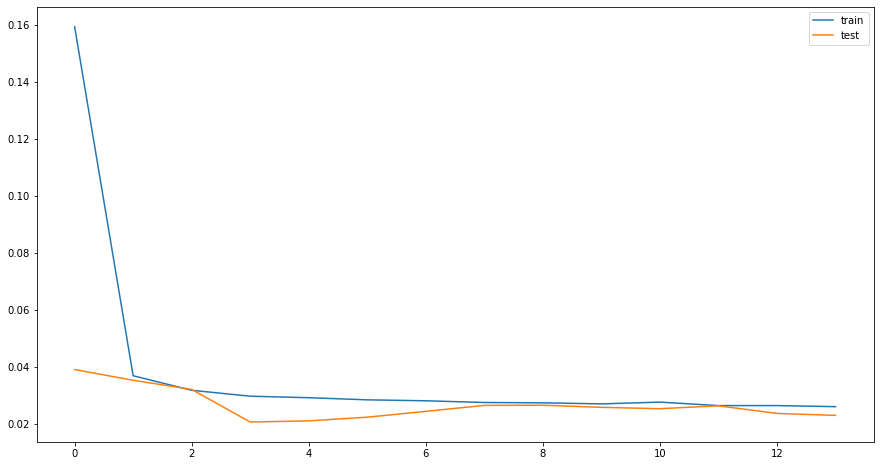

In [59]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mse = model.evaluate(test_X, test_y)
mse


In [60]:
print("Train:")
get_metrics(model, rel_hand_scaler, train_X, train_y)
print("\nTest:")
get_metrics(model, rel_hand_scaler, test_X, test_y)

Train:
MSE:  131.13124
RMSE:  11.451255
MAE:  8.603576

Test:
MSE:  112.91575
RMSE:  10.626183
MAE:  8.48684
